In [50]:
import matplotlib
import seaborn as sns
%matplotlib inline

In [51]:
import json

In [52]:
import pandas as pd

In [53]:
earthquate = json.load(open('earthquake.geo.json'))

In [54]:
len(earthquate['features'])

404

In [55]:
earthquate['features'][0]

{'geometry': {'coordinates': [103.8585, 33.1993, 9], 'type': 'Point'},
 'id': 'us2000a5x1',
 'properties': {'alert': 'yellow',
  'cdi': 5.4,
  'code': '2000a5x1',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000a5x1&format=geojson',
  'dmin': 11.416,
  'felt': 101,
  'gap': 22,
  'ids': ',us2000a5x1,',
  'mag': 6.5,
  'magType': 'mww',
  'mmi': 7,
  'net': 'us',
  'nst': None,
  'place': '35km WSW of Yongle, China',
  'rms': 0.83,
  'sig': 705,
  'sources': ',us,',
  'status': 'reviewed',
  'time': 1502198389570,
  'title': 'M 6.5 - 35km WSW of Yongle, China',
  'tsunami': 0,
  'type': 'earthquake',
  'types': ',dyfi,general-text,geoserve,losspager,moment-tensor,origin,phase-data,shakemap,',
  'tz': 480,
  'updated': 1502208206710,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000a5x1'},
 'type': 'Feature'}

In [56]:
df_earthquake = pd.DataFrame(
    [
        dict(
            list(e['properties'].items())
            +
            list(e['geometry'].items())
        )
        for e in earthquate['features']
    ])

In [57]:
#df_earthquake

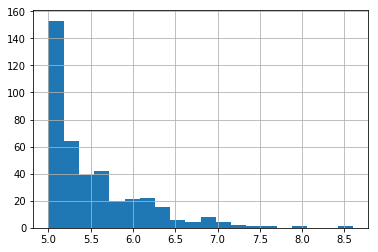

In [58]:
df_earthquake['mag'].hist(bins=20)

In [59]:
df_earthquake['time']

0      1502198389570
1      1490572506280
2      1485542796360
3      1479419156570
4      1474564995960
5      1474562836160
6      1427680055990
7      1423256467800
8      1421212898830
9      1416928748050
10     1416646526580
11     1412126609420
12     1408226879640
13     1407054613570
14     1402358054980
15     1396651235440
16     1387170294440
17     1385690089070
18     1380855673290
19     1377908821770
20     1377907457750
21     1377636293360
22     1376265526250
23     1376256221310
24     1366841430700
25     1366535123540
26     1366516777540
27     1366491223110
28     1366428855550
29     1366421847920
           ...      
374    -610878358000
375    -610972655000
376    -611086106000
377    -611305266000
378    -611362324000
379    -611455113000
380    -611466521000
381    -611469261000
382    -611515075000
383    -611519209000
384    -611549905000
385    -611574626000
386    -681756506000
387    -719336423000
388   -1020419089000
389   -1061225654000
390   -106289

In [60]:
import datetime

In [61]:
df_earthquake['datetime'] = df_earthquake['time'].apply(lambda t: datetime.datetime.fromtimestamp(t/1000))

In [62]:
# df_earthquake.set_index('datetime').resample('60m', 'count')['mag'].plot()
# https://stackoverflow.com/questions/43206554/typeerror-float-argument-must-be-a-string-or-a-number-not-period

Let's draw a time series to see how many earthquakes are there each year.

It seems we have more and more earthquakes... (count)

/Users/hupili/Projects/DEMP2017/dmep2017.github.io/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


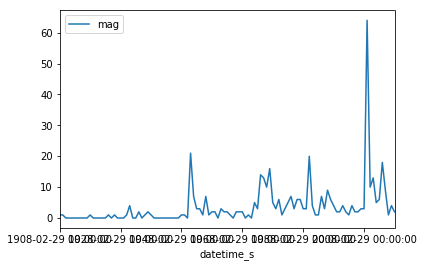

In [63]:
r = df_earthquake.set_index('datetime').resample('12m', 'count')['mag'].reset_index()
r['datetime_s'] = r['datetime'].apply(lambda d: str(d))
r.plot(x='datetime_s', y='mag')

So we drill-down the data.

We plot year on x-axis and magnitude on y-axis. In this way, we can visualise the distribution of earthquakes.

It sees there are not more big ones. The increase in number (count) is mainly due to smaller magnitudes around 5.

What is the reason? Is it because the upgrade of monitoring device? Is it because the lack of historical data, so data prior to a certain date is derived rather than recorded?

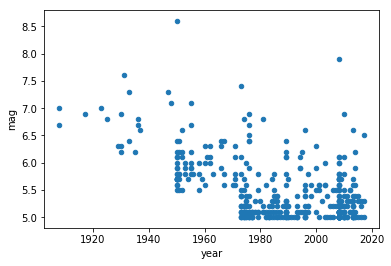

In [64]:
df_earthquake['year'] = df_earthquake['datetime'].apply(lambda dt: dt.year)
df_earthquake.plot(x='year', y='mag', kind='scatter')

There are more story to tell but we just stop here so that you can further explore.

In [101]:
all_years = []
for year in range(1908, 2018):
    df_this_year = df_earthquake[df_earthquake['year'] == year]
    data = []
    for (i, r) in df_this_year.iterrows():
        data.append(
        {
            'mag': r['mag'], 
            'coordinates': r['coordinates'],
            'title': r['title']
        })
    all_years.append(
        {
            'year': year,
            'data': data
        })

In [93]:
#type(df_earthquake['coordinates'].ix[0])

In [104]:
open('earthquake-by-year.json', 'w').write(json.dumps(all_years))

41499